In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset splitted/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset splitted/val',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset splitted/test',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

Found 4795 images belonging to 80 classes.
Found 1000 images belonging to 80 classes.
Found 1105 images belonging to 80 classes.


In [ ]:
# Load InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(80, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=8)

Epoch 1/8
150/150 [==============================] - 2792s 19s/step - loss: 2.8184 - accuracy: 0.3483 - val_loss: 1.7058 - val_accuracy: 0.5690
Epoch 2/8
150/150 [==============================] - 1659s 11s/step - loss: 1.1279 - accuracy: 0.7103 - val_loss: 1.1054 - val_accuracy: 0.7010
Epoch 3/8
150/150 [==============================] - 1654s 11s/step - loss: 0.6505 - accuracy: 0.8323 - val_loss: 0.9476 - val_accuracy: 0.7210
Epoch 4/8
150/150 [==============================] - 1609s 11s/step - loss: 0.3975 - accuracy: 0.9049 - val_loss: 0.7695 - val_accuracy: 0.7790
Epoch 5/8
150/150 [==============================] - 1609s 11s/step - loss: 0.2597 - accuracy: 0.9416 - val_loss: 0.7474 - val_accuracy: 0.7880
Epoch 6/8
150/150 [==============================] - 1656s 11s/step - loss: 0.1803 - accuracy: 0.9625 - val_loss: 0.6227 - val_accuracy: 0.8140
Epoch 7/8
150/150 [==============================] - 1658s 11s/step - loss: 0.1085 - accuracy: 0.9819 - val_loss: 0.5975 - val_accuracy:

In [ ]:
model.save('inceptionv3_model_3_4_2024_5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy*100)

35/35 [==============================] - 505s 15s/step - loss: 0.5931 - accuracy: 0.8235
Test Loss: 0.5930925607681274
Test Accuracy: 82.35294222831726


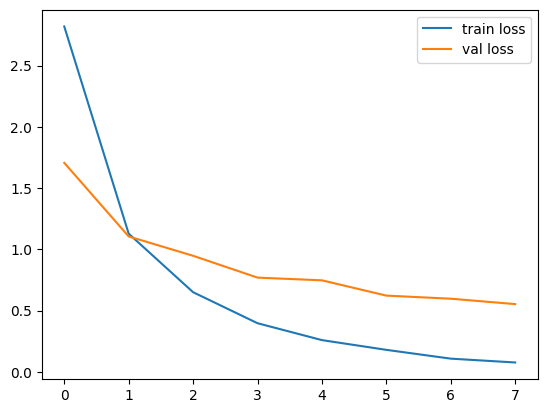

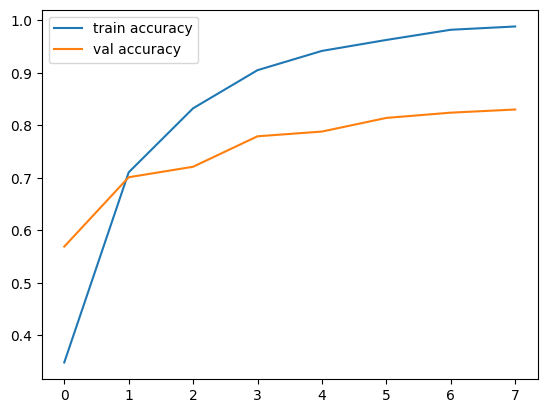

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()



In [ ]:
import os
file_path='/content/drive/MyDrive/archive/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset splitted/train'
name_class = os.listdir(file_path)
name_class

['Tomato',
 'Thumbe',
 'Tamarind',
 'Tecoma',
 'Seethaashoka',
 'Tulsi',
 'Spinach1',
 'Taro',
 'Turmeric',
 'Seethapala',
 'Papaya',
 'Rose',
 'Pepper',
 'Sapota',
 'Raddish',
 'Pumpkin',
 'Parijatha',
 'Sampige',
 'Pea',
 'Pomoegranate',
 'Nooni',
 'Onion',
 'Padri',
 'Mint',
 'Mango',
 'Nerale',
 'Palak(Spinach)',
 'Neem',
 'Nelavembu',
 'Marigold',
 'Kohlrabi',
 'kamakasturi',
 'Kasambruga',
 'Lantana',
 'Malabar_Spinach',
 'Malabar_Nut',
 'Kambajala',
 'kepala',
 'Lemon',
 'Lemongrass',
 'Henna',
 'Jasmine',
 'Guava',
 'Hibiscus',
 'Gasagase',
 'Insulin',
 'Globe Amarnath',
 'Ginger',
 'Jackfruit',
 'Honge',
 'Doddpathre',
 'Ganike',
 'Curry',
 'Eucalyptus',
 'Ganigale',
 'Common rue(naagdalli)',
 'Coffee',
 'Coriender',
 'Ekka',
 'Drumstick',
 'camphor',
 'Bringaraja',
 'Caricature',
 'Catharanthus',
 'Bhrami',
 'Chilly',
 'Citron lime (herelikai)',
 'Castor',
 'Betel',
 'Chakte',
 'Amla',
 'Bamboo',
 'Astma_weed',
 'Amruthaballi',
 'Arali',
 'Badipala',
 'Aloevera',
 'Beans',
 '

1/1 [==============================] - 9s 9s/step


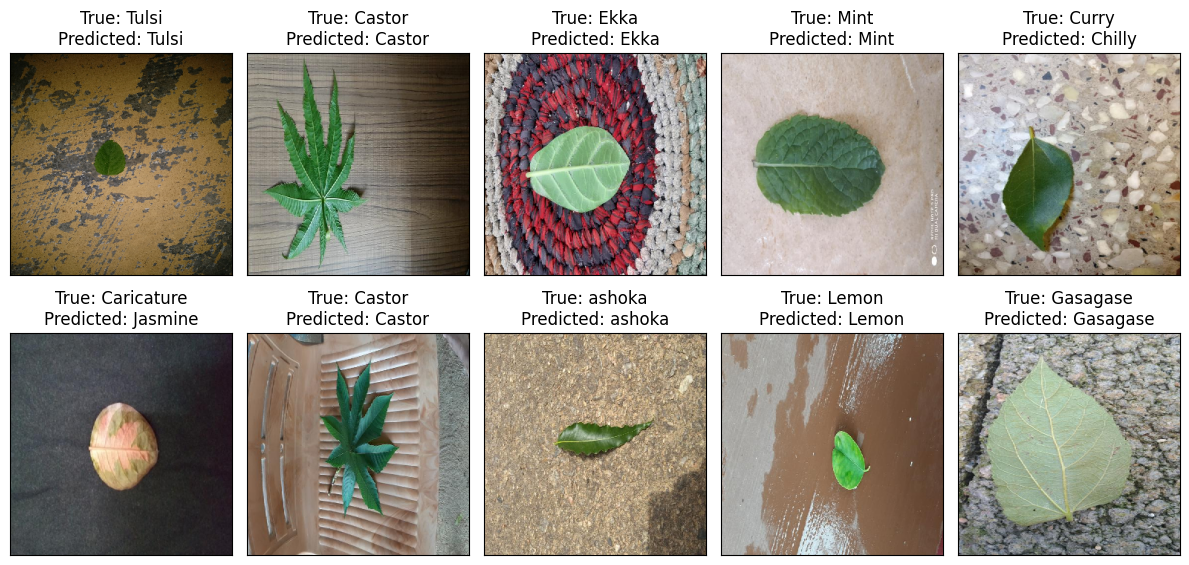

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the test generator
batch_images, batch_labels = test_generator.next()

# Make predictions on the batch of images
predictions = model.predict(batch_images)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot images with their predicted and actual names
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(batch_images[i])

    # Get the predicted class label
    predicted_class_idx = np.argmax(predictions[i])
    predicted_class_name = class_names[predicted_class_idx]

    # Get the actual class label
    actual_class_idx = np.argmax(batch_labels[i])
    actual_class_name = class_names[actual_class_idx]

    # Set title with predicted and actual class names
    ax.set_title(f"True: {actual_class_name}\nPredicted: {predicted_class_name}")

plt.tight_layout()
plt.show()

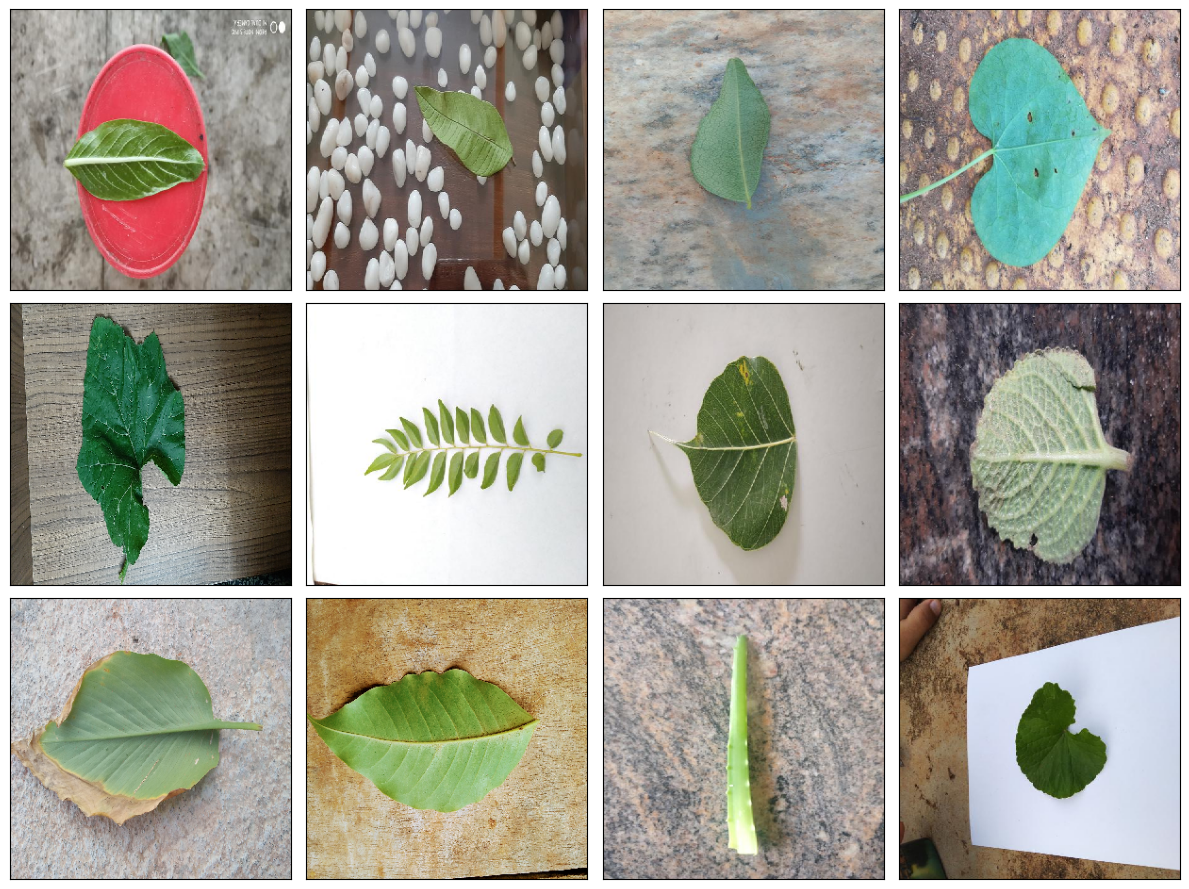

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training generator
batch_images, _ = train_generator.next()

# Plot images from the training data in a 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(batch_images[i])

plt.tight_layout()
plt.show()

In [ ]:
file_path='/content/drive/MyDrive/archive/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'

In [ ]:
import glob
filepaths = list(glob.glob(file_path+'/**/*.*'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/archive/Indian Medicina...,Tulsi
1,/content/drive/MyDrive/archive/Indian Medicina...,Catharanthus
2,/content/drive/MyDrive/archive/Indian Medicina...,Betel
3,/content/drive/MyDrive/archive/Indian Medicina...,Betel
4,/content/drive/MyDrive/archive/Indian Medicina...,Amruthaballi


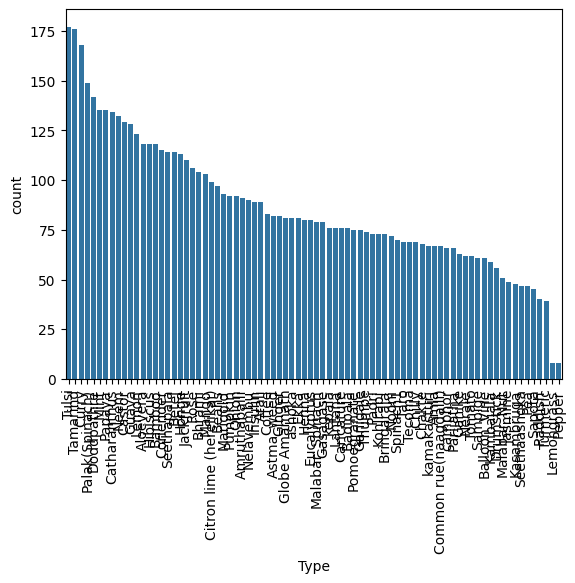

In [ ]:
import seaborn as sns
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

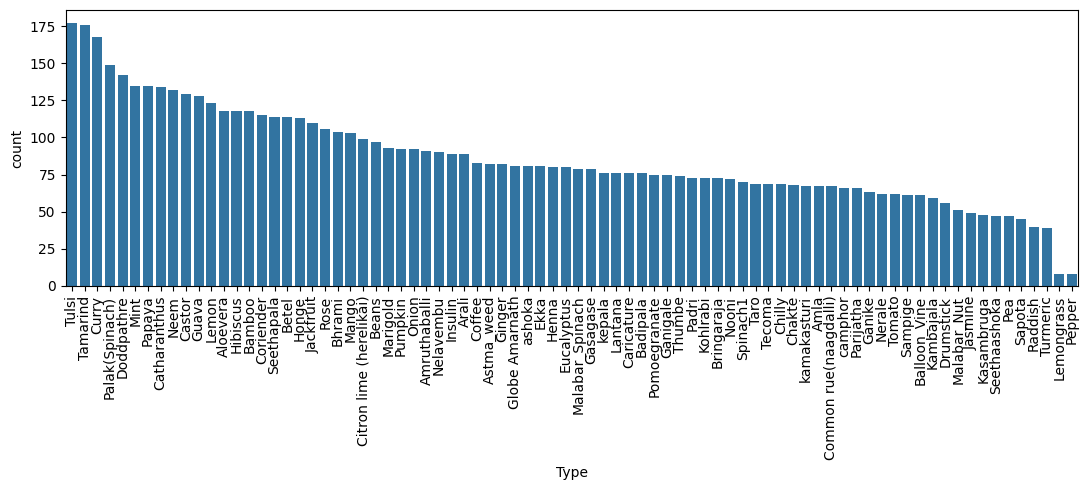

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get counts of each class
counts = data.Label.value_counts()

# Plot bar graph
plt.figure(figsize=(11, 5))  # Increase figure size
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90, fontsize=10)  # Rotate and set font size for x-axis labels
plt.tight_layout()
plt.show()
